In [56]:
# Neural network classification with pytorch

In [57]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [58]:
len(X), len(y)

(1000, 1000)

In [59]:
print(f"X: {X[:5]}")
print(f"y: {y[:5]}")

X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y: [1 1 1 1 0]


In [60]:
# Make DataFrame of circle Data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


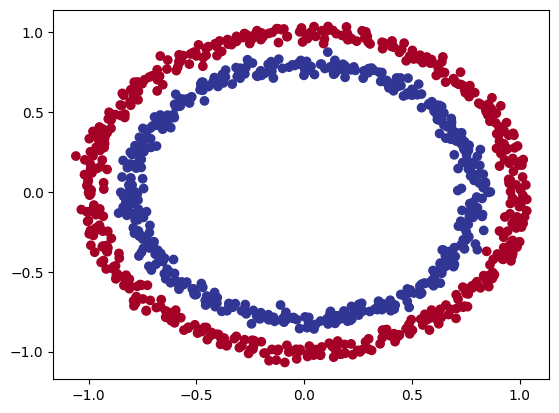

In [61]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0], y = X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [62]:
# The data here is reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizable enough to practice the fundamentals

In [63]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [64]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [65]:
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}")
print(f"Sample target value: {y_sample}")
shape_X = X_sample.shape
shape_y = y_sample.shape
print(f"Shape of X: {shape_X}")
print(f"Shape of y: {shape_y}")

Sample input features: [0.75424625 0.23148074]
Sample target value: 1
Shape of X: (2,)
Shape of y: ()


In [66]:
# Turn data into tensors and create train and test splits

In [67]:
import torch
torch.__version__

'2.4.0+cu121'

In [68]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [69]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [70]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [71]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [72]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [74]:
# Building the model

# 1. Set up device agnostic code
# 2. Constuct a model by subclassing nn.Module
# 3. Define loss function and optimizer
# 4. Training and test loop

In [75]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [76]:
X_train.shape

torch.Size([800, 2])

In [77]:
y_train

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [78]:
# Subclasses nn.Module, create 2 nn.Linear() layers that are capable of handling the shapes of our data
# Define a forward() method that outlines the forward pass of our model
# Instantiate an instance of our model class and send it to the target device

In [79]:
# Constuct the model

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2 Create 2 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and spits out 1

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [80]:
device

'cuda'

In [81]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [82]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [83]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0146, -0.5560],
                      [ 0.1289,  0.4091],
                      [-0.5863, -0.1868],
                      [-0.0338,  0.1960],
                      [-0.0735, -0.5947]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2547, -0.7026, -0.1078, -0.2730,  0.6405], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0482,  0.2465, -0.4355, -0.0804,  0.3103]], device='cuda:0')),
             ('1.bias', tensor([0.2580], device='cuda:0'))])

In [84]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"{len(untrained_preds)} , {untrained_preds.shape}")
print(f"{len(X_test)} , {X_test.shape}")
print(f"{untrained_preds[:5]}")
print(f"{y_test[:10]}")

200 , torch.Size([200, 1])
200 , torch.Size([200, 2])
tensor([[0.2708],
        [0.3772],
        [0.1749],
        [0.2972],
        [0.4655]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [85]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [86]:
# Setup loss function and optimizer
# Loss function? Optimizer? -> Depends on the problem
# Regression - MAE or MSE
# Classification - binary crossentropy or categorical crossentroy
# optimizers - SGD and Adam, pytorch has a lot more

In [87]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation built in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [88]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [89]:
#Train model

# Forward pass
# Calc the loss
# Optimizer zero grad
# Loss backward
# Optimizer (gradient descent)

In [90]:
# Our model outputs are going to be raw logits -> logits can be converted into prediction probabilities by passing them through some king of activation function(sigmoid, softmax) -> convert model probabilities into prediction labels by rouding them or taking the argmax()

In [91]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2708],
        [0.3772],
        [0.1749],
        [0.2972],
        [0.4655]], device='cuda:0', grad_fn=<SliceBackward0>)

In [92]:
# Use the sigmoid activation fcn on our logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5673],
        [0.5932],
        [0.5436],
        [0.5738],
        [0.6143]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [93]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [94]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [95]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)

# logits -> pred probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [96]:
# Building a training and test loop

!nvidia-smi

Tue Sep 10 11:31:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              32W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [97]:
torch.cuda.manual_seed(8)

epochs = 300

# put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calc loss/acc
  loss = loss_fn(y_logits, # nn.BCEwithLogits expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward - backpropagation
  loss.backward()

  # Optimizer step - gradient descent
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.71249, Acc: 50.00%, Test loss: 0.71448, Test_acc:50.00%
EPoch: 10, Loss 0.70059, Acc: 56.88%, Test loss: 0.70488, Test_acc:52.00%
EPoch: 20, Loss 0.69694, Acc: 52.62%, Test loss: 0.70186, Test_acc:49.50%
EPoch: 30, Loss 0.69568, Acc: 52.00%, Test loss: 0.70064, Test_acc:47.50%
EPoch: 40, Loss 0.69512, Acc: 51.75%, Test loss: 0.69994, Test_acc:48.00%
EPoch: 50, Loss 0.69479, Acc: 51.12%, Test loss: 0.69940, Test_acc:48.00%
EPoch: 60, Loss 0.69455, Acc: 51.12%, Test loss: 0.69894, Test_acc:48.00%
EPoch: 70, Loss 0.69436, Acc: 51.00%, Test loss: 0.69853, Test_acc:48.00%
EPoch: 80, Loss 0.69419, Acc: 50.88%, Test loss: 0.69817, Test_acc:49.00%
EPoch: 90, Loss 0.69406, Acc: 50.75%, Test loss: 0.69784, Test_acc:49.00%
EPoch: 100, Loss 0.69394, Acc: 50.75%, Test loss: 0.69755, Test_acc:49.00%
EPoch: 110, Loss 0.69383, Acc: 50.62%, Test loss: 0.69730, Test_acc:49.00%
EPoch: 120, Loss 0.69374, Acc: 50.50%, Test loss: 0.69706, Test_acc:49.00%
EPoch: 130, Loss 0.69366, Acc: 50.62

In [98]:
# Make predictions and evaluate the model

# Model is guessing basically

# Make some predictions and make them visual

In [99]:
import requests
from pathlib import Path

#Dld helper funtions

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper fncs")
  request = requests.get(r"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Already exists


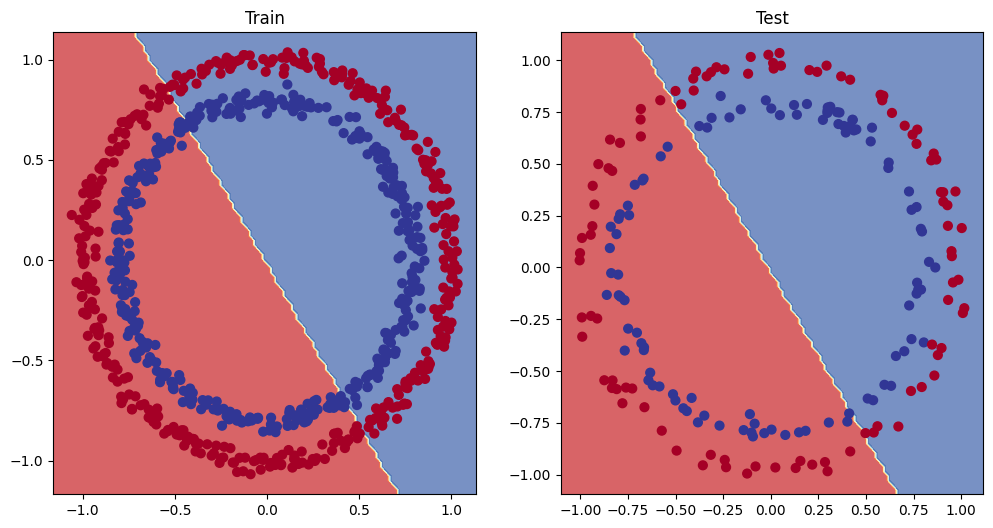

In [100]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [101]:
#Improving a model - From a model's perspective
# Add more layers - give the model more changes to learn about patterns in the data
# Add more hidden units - go from 5 hidden units to 10 hidden units
# Fit for longer
# Changing the activation function
# Change the learning rate
# Change the loss function

# These options are all from a model's perspective because they deal directly with the model and not the data

In [102]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0202, -0.5563],
                      [ 0.0074,  0.4116],
                      [-0.4674, -0.1889],
                      [-0.0204,  0.1957],
                      [-0.1610, -0.5924]])),
             ('0.bias', tensor([-0.2498, -0.7522, -0.0412, -0.2636,  0.5970])),
             ('1.weight',
              tensor([[-0.0176,  0.3445, -0.2350, -0.0249,  0.2459]])),
             ('1.bias', tensor([0.0925]))])

In [103]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2 Create 3 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [104]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1624, -0.4396],
                      [ 0.3268,  0.6480],
                      [-0.0488,  0.3845],
                      [-0.4789,  0.2807],
                      [ 0.0581,  0.6129],
                      [ 0.3826,  0.6678],
                      [-0.1229, -0.0160],
                      [-0.0874, -0.0930],
                      [-0.5715, -0.4849],
                      [-0.2045, -0.4873]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6629, -0.3388,  0.0360, -0.6954,  0.1768,  0.6942, -0.2350, -0.4063,
                       0.4817,  0.0371], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3524e-01, -2.3057e-01, -2.1674e-01, -1.1885e-01, -2.7176e-01,
                       -1.1304e-01, -7.0117e-02,  1.2341e-01,  5.3552e-02, -2.6229e-01],
                      [ 2.0862e-02, -1.0687e-01,  1.0567e-01,  2.2564e-01, -1.9347e-01,
                       -4.2755e-02,  5.9857e-02

In [105]:
# Create a loss funtion

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [106]:
torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.69467, Acc: 51.25%, Test loss: 0.70120, Test_acc:46.50%
EPoch: 100, Loss 0.69317, Acc: 50.50%, Test loss: 0.69606, Test_acc:46.00%
EPoch: 200, Loss 0.69303, Acc: 50.88%, Test loss: 0.69503, Test_acc:46.00%
EPoch: 300, Loss 0.69300, Acc: 50.38%, Test loss: 0.69475, Test_acc:46.00%
EPoch: 400, Loss 0.69299, Acc: 50.88%, Test loss: 0.69467, Test_acc:47.00%
EPoch: 500, Loss 0.69299, Acc: 51.25%, Test loss: 0.69466, Test_acc:47.00%
EPoch: 600, Loss 0.69298, Acc: 51.38%, Test loss: 0.69466, Test_acc:47.00%
EPoch: 700, Loss 0.69298, Acc: 51.25%, Test loss: 0.69466, Test_acc:46.50%
EPoch: 800, Loss 0.69298, Acc: 51.00%, Test loss: 0.69466, Test_acc:46.50%
EPoch: 900, Loss 0.69298, Acc: 51.25%, Test loss: 0.69467, Test_acc:46.00%


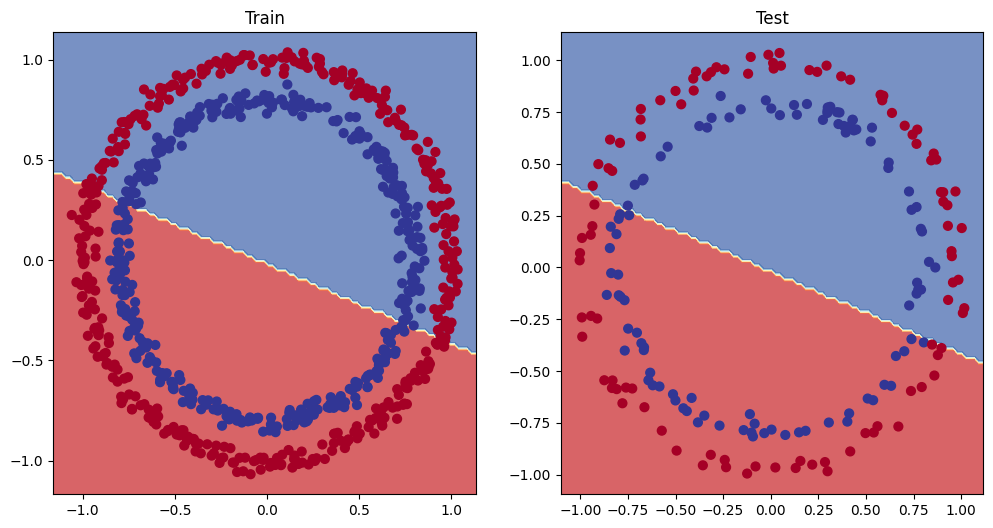

In [107]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [110]:
# One way to troubleshoot is to test out a smaller problem

# create some data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))

In [111]:
len(X_regression)

100

In [113]:
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [116]:
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:]
len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

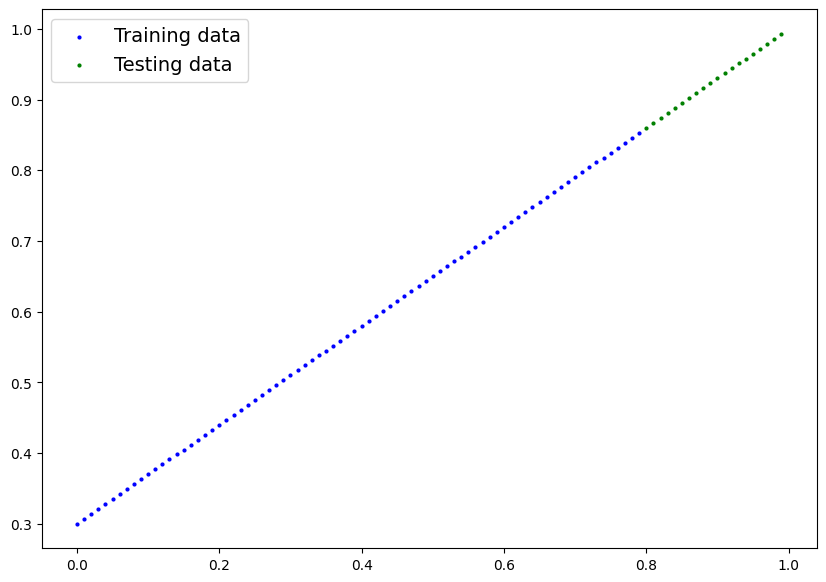

In [117]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=None)

In [118]:
# Adjust model 1 to fit a straight line

In [119]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [128]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [129]:
#train the model

torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 5000

# Put data on target device

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_reg)

  loss = loss_fn(y_pred, y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)

    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 100 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.00912, Acc: 0.00%, Test loss: 0.00505, Test_acc:0.00%
EPoch: 100, Loss 0.00193, Acc: 0.00%, Test loss: 0.00086, Test_acc:0.00%
EPoch: 200, Loss 0.00176, Acc: 0.00%, Test loss: 0.00118, Test_acc:0.00%
EPoch: 300, Loss 0.00159, Acc: 0.00%, Test loss: 0.00150, Test_acc:0.00%
EPoch: 400, Loss 0.00143, Acc: 0.00%, Test loss: 0.00182, Test_acc:0.00%
EPoch: 500, Loss 0.00126, Acc: 0.00%, Test loss: 0.00214, Test_acc:0.00%
EPoch: 600, Loss 0.00109, Acc: 0.00%, Test loss: 0.00246, Test_acc:0.00%
EPoch: 700, Loss 0.00092, Acc: 0.00%, Test loss: 0.00278, Test_acc:0.00%
EPoch: 800, Loss 0.00076, Acc: 0.00%, Test loss: 0.00310, Test_acc:0.00%
EPoch: 900, Loss 0.00067, Acc: 0.00%, Test loss: 0.00330, Test_acc:0.00%
EPoch: 1000, Loss 0.00073, Acc: 0.00%, Test loss: 0.00328, Test_acc:0.00%
EPoch: 1100, Loss 0.00071, Acc: 0.00%, Test loss: 0.00325, Test_acc:0.00%
EPoch: 1200, Loss 0.00077, Acc: 0.00%, Test loss: 0.00334, Test_acc:0.00%
EPoch: 1300, Loss 0.00083, Acc: 0.00%, Test loss: 

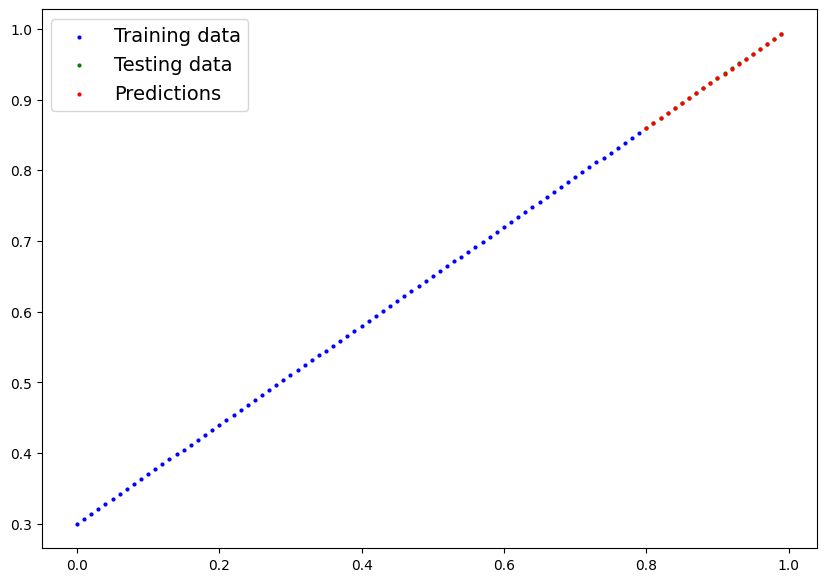

In [132]:
# Turn on evaluation mode
model_2.eval()

#Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_reg)

#plot data and preds
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

In [134]:
# Non-linearity
# Patterns wih an infinite number of straight and non-straight lines

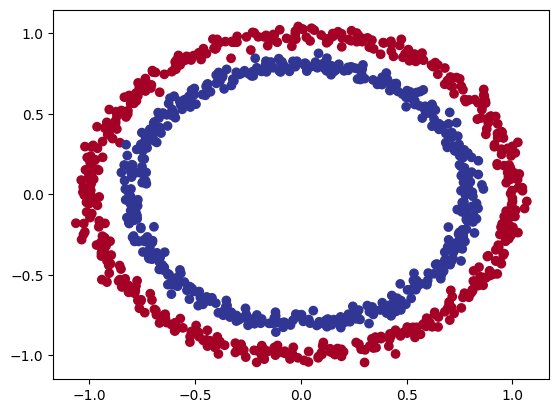

In [135]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                  noise=0.03,
                  random_state=8)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [139]:
import torch
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[-0.8191,  0.4985],
         [-0.7867, -0.2926],
         [-0.2609, -1.0107],
         [ 0.3147,  0.9709],
         [ 0.8476, -0.5116]]),
 tensor([0., 1., 0., 0., 0.]))

In [140]:
# Build a model with non-linear activation funtions
from torch import nn

class CricleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CricleModelV2().to(device)
model_3

CricleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [141]:
# Loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [146]:
torch.manual_seed(8)
torch.cuda.manual_seed(42)

epochs = 500

# Put data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"EPoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test_acc:{test_acc:.2f}%")

EPoch: 0, Loss 0.67050, Acc: 63.25%, Test loss: 0.67706, Test_acc:60.00%
EPoch: 10, Loss 0.66974, Acc: 62.75%, Test loss: 0.67631, Test_acc:58.50%
EPoch: 20, Loss 0.66894, Acc: 61.75%, Test loss: 0.67551, Test_acc:59.00%
EPoch: 30, Loss 0.66812, Acc: 61.88%, Test loss: 0.67468, Test_acc:58.50%
EPoch: 40, Loss 0.66727, Acc: 61.38%, Test loss: 0.67381, Test_acc:58.50%
EPoch: 50, Loss 0.66639, Acc: 61.00%, Test loss: 0.67290, Test_acc:57.00%
EPoch: 60, Loss 0.66547, Acc: 60.62%, Test loss: 0.67197, Test_acc:56.50%
EPoch: 70, Loss 0.66444, Acc: 60.12%, Test loss: 0.67094, Test_acc:55.50%
EPoch: 80, Loss 0.66342, Acc: 60.50%, Test loss: 0.66979, Test_acc:55.50%
EPoch: 90, Loss 0.66236, Acc: 60.88%, Test loss: 0.66864, Test_acc:55.50%
EPoch: 100, Loss 0.66125, Acc: 60.88%, Test loss: 0.66748, Test_acc:56.00%
EPoch: 110, Loss 0.66005, Acc: 61.00%, Test loss: 0.66637, Test_acc:56.00%
EPoch: 120, Loss 0.65860, Acc: 61.38%, Test loss: 0.66511, Test_acc:57.00%
EPoch: 130, Loss 0.65679, Acc: 62.38

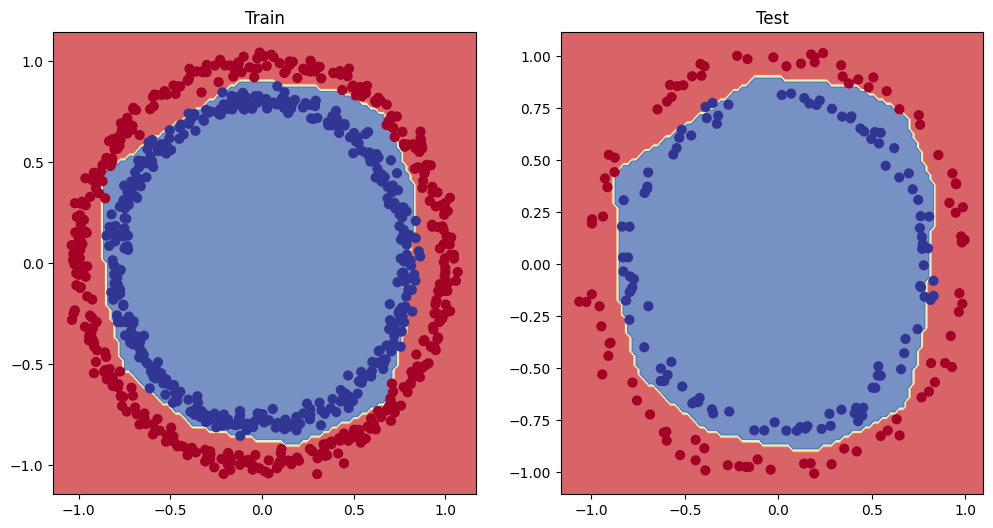

In [147]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)